# Semestrální projekt 2

In [ ]:
# install.packages("Sleuth2")
# install.packages("GGally")
# install.packages("corrplot")
# install.packages("olsrr")
# install.packages("lmtest")

library(lmtest)
library(olsrr)
library(corrplot)
library(Sleuth2)
library(dplyr)
library(ggplot2)
library(cowplot)
library(repr)

## Úloha 1 (5b): Načtěte datový soubor a proveďte základní statistická šetření:

- Data a jednotlivé proměnné stručně slovně popište.
- Určete nejdůležitější statistické míry, které data nejlépe charakterizují.
- Vhodně data reprezentujte pomocí vybraných grafů.

In [2]:
df <- ex0918

In [3]:
str(df)

'data.frame':	21 obs. of  8 variables:
 $ Continent: Factor w/ 2 levels "NA","EU": 1 1 1 1 1 1 1 1 1 2 ...
 $ Latitude : num  35.5 37 38.6 40.7 40.9 42.4 45 46.8 48.8 49.8 ...
 $ Females  : num  901 896 906 907 898 893 913 915 927 924 ...
 $ SE.F     : num  2.5 3.5 3 3.5 3.6 3.4 4.3 3.8 2 4.5 ...
 $ Males    : num  797 806 812 807 818 809 810 819 800 823 ...
 $ SE.M     : num  3.8 3 3.2 3.2 2.7 3.3 4.3 3.3 4.9 2.2 ...
 $ Ratio    : num  0.831 0.834 0.836 0.833 0.83 0.828 0.834 0.825 0.832 0.824 ...
 $ SE.R     : num  0.01 0.014 0.012 0.013 0.012 0.015 0.024 0.014 0.009 0.011 ...


### Popis dat:

Dataset obsahuje **21 pozorování** much z Evropy (EU) a Severní Ameriky (NA) s následujícími proměnnými:

- **Continent**: Kontinent původu (EU nebo NA)
- **Latitude**: Zeměpisná šířka v stupních
- **Females** a **Males**: Průměrná velikost křídel samic a samců (v logaritmické škále)
- **SE.F** a **SE.M**: Standardní chyby těchto měření
- **Ratio**: Poměr bazální délky ku velikosti křídla samic much
- **SE.R**: Standardní chyba tohoto poměru

In [4]:
head(df)

,Continent,Latitude,Females,SE.F,Males,SE.M,Ratio,SE.R
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,35.5,901,2.5,797,3.8,0.831,0.010
2,NA,37.0,896,3.5,806,3.0,0.834,0.014
3,NA,38.6,906,3.0,812,3.2,0.836,0.012
4,NA,40.7,907,3.5,807,3.2,0.833,0.013
5,NA,40.9,898,3.6,818,2.7,0.830,0.012
6,NA,42.4,893,3.4,809,3.3,0.828,0.015


In [5]:
summary(df)

 Continent    Latitude       Females         SE.F           Males      
 NA: 9     Min.   :35.5   Min.   :889   Min.   :2.000   Min.   :789.0  
 EU:12     1st Qu.:40.7   1st Qu.:901   1st Qu.:3.200   1st Qu.:807.0  
           Median :45.0   Median :915   Median :3.500   Median :812.0  
           Mean   :44.6   Mean   :914   Mean   :3.652   Mean   :815.1  
           3rd Qu.:48.8   3rd Qu.:926   3rd Qu.:4.300   3rd Qu.:819.0  
           Max.   :56.1   Max.   :944   Max.   :6.100   Max.   :855.0  
      SE.M           Ratio            SE.R        
 Min.   :2.200   Min.   :0.809   Min.   :0.00700  
 1st Qu.:3.100   1st Qu.:0.824   1st Qu.:0.01200  
 Median :3.300   Median :0.826   Median :0.01300  
 Mean   :3.724   Mean   :0.827   Mean   :0.01476  
 3rd Qu.:4.300   3rd Qu.:0.832   3rd Qu.:0.01600  
 Max.   :6.200   Max.   :0.836   Max.   :0.03200  

In [6]:
stats <- df %>%
  summarise(
    mean_ratio = mean(Ratio, na.rm = TRUE),
    sd_ratio = sd(Ratio, na.rm = TRUE),
    median_ratio = median(Ratio, na.rm = TRUE),
    min_ratio = min(Ratio, na.rm = TRUE),
    max_ratio = max(Ratio, na.rm = TRUE),
    mean_lat = mean(Latitude, na.rm = TRUE),
    sd_lat = sd(Latitude, na.rm = TRUE),
    mean_females = mean(Females, na.rm = TRUE),
    sd_females = sd(Females, na.rm = TRUE),
    mean_males = mean(Males, na.rm = TRUE),
    sd_males = sd(Males, na.rm = TRUE)
  )

print(stats)

  mean_ratio    sd_ratio median_ratio min_ratio max_ratio mean_lat   sd_lat
1      0.827 0.006418723        0.826     0.809     0.836     44.6 5.707626
  mean_females sd_females mean_males sd_males
1     913.9524   15.41907   815.0952 15.29348


Nejdůležitější statistické míry pro vysvětlovanou proměnnou `Ratio`:
- **Průměr**: centrální tendence poměru velikosti křídel
- **Směrodatná odchylka**: rozptýlení hodnot kolem průměru
- **Medián**: prostřední hodnota poměru
- **Minimum a maximum**: rozsah pozorovaných hodnot

### Graficka reprezentace

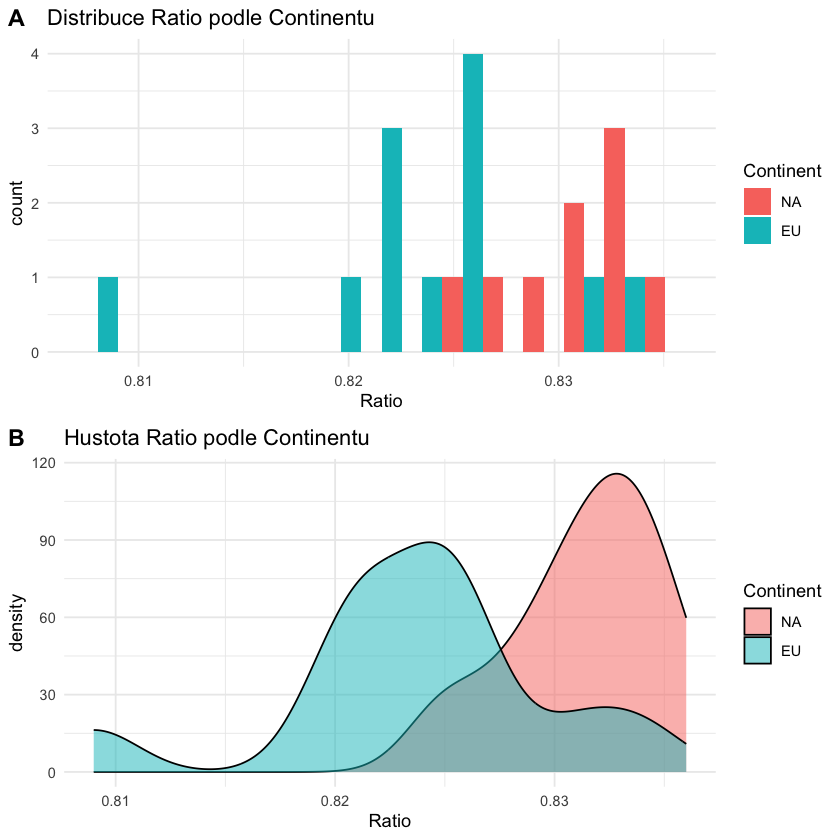

In [7]:
p_ratio <- ggplot(df, aes(x = Ratio, fill = Continent)) +
  geom_histogram(position = "dodge", bins = 15) +
  labs(title = "Distribuce Ratio podle Continentu", x = "Ratio") +
  theme_minimal()

p_density <- ggplot(df, aes(x = Ratio, fill = Continent)) +
  geom_density(alpha = 0.5) +
  labs(title = "Hustota Ratio podle Continentu", x = "Ratio") +
  theme_minimal()

combined_plot <- plot_grid(p_ratio, p_density, nrow = 2, labels = "AUTO")
print(combined_plot)

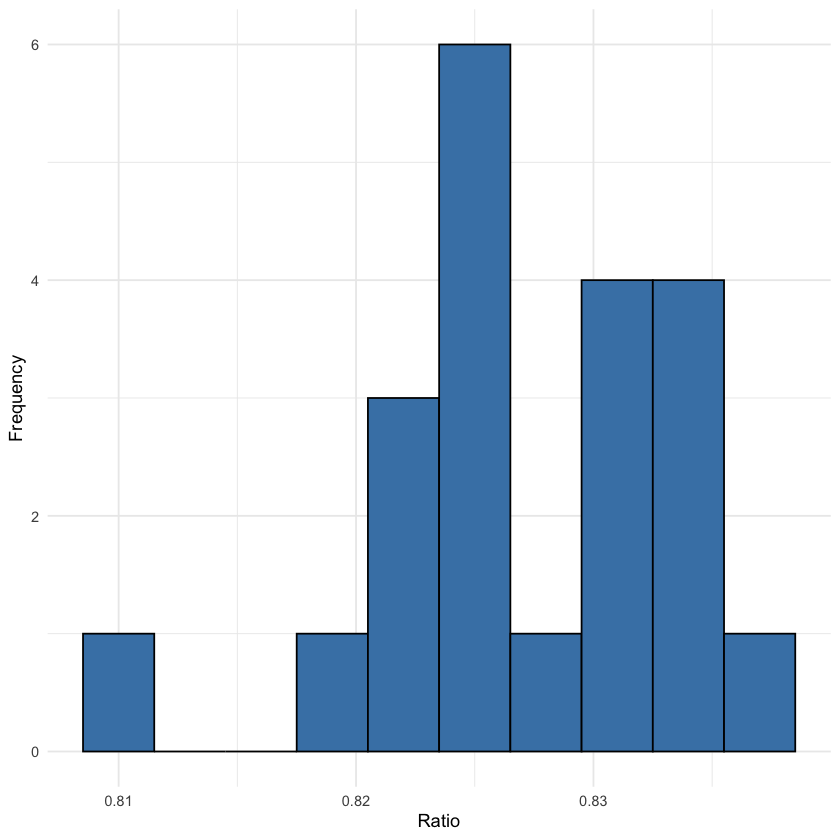

In [8]:
ggplot(df, aes(x = Ratio)) +
  geom_histogram(bins = 10, fill = "steelblue", color = "black") +
  labs(x = "Ratio", y = "Frequency") + theme_minimal()

            Latitude    Females      Males       Ratio
Latitude  1.00000000 0.73761787  0.6619929 -0.07956726
Females   0.73761787 1.00000000  0.6736524  0.08537879
Males     0.66199286 0.67365243  1.0000000 -0.10747256
Ratio    -0.07956726 0.08537879 -0.1074726  1.00000000


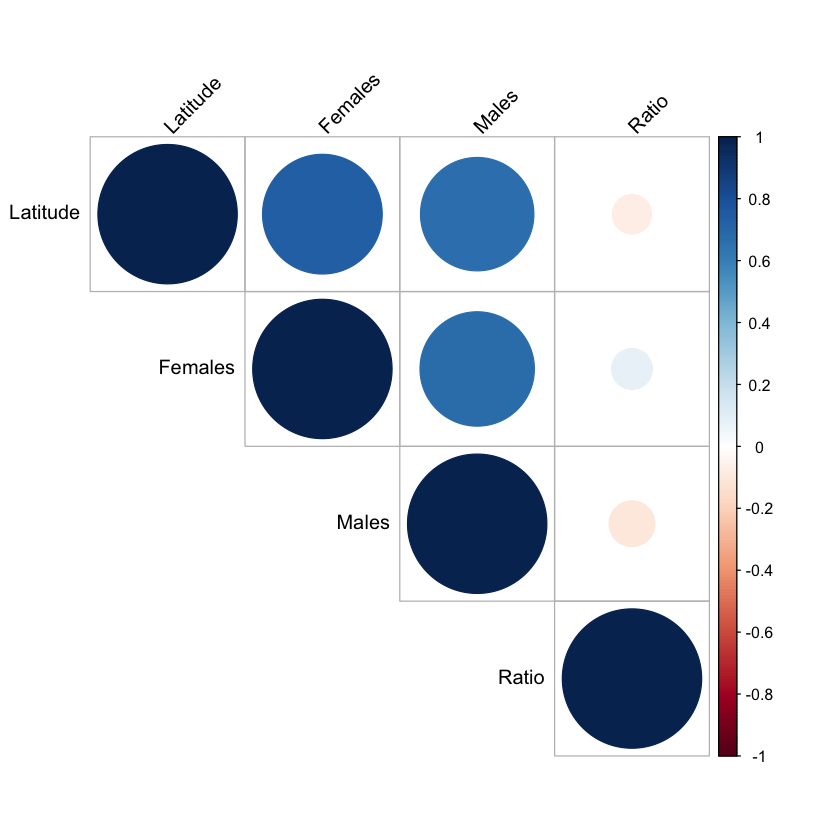

In [9]:
cor_matrix <- cor(df[, c("Latitude", "Females", "Males", "Ratio")], use = "complete.obs")
print(cor_matrix)

corrplot::corrplot(cor_matrix, method = "circle", type = "upper", tl.col = "black", tl.srt = 45)

**Korelační matice** ukazuje, že existuje poměrně silný vztah mezi proměnnou *Latitude* a poměry *Females/Males*, a také mezi *Females* a *Males* samotnými – což je logické, protože velikost samic a samců spolu souvisí. Naopak je vidět, že proměnná Ratio nevykazuje **žádný významný vztah s ostatními proměnnými**.

## Úloha 2 (5b): Vyberte si jednu numerickou proměnnou jako regresor.

- Pomocí lineárního regresního modelu nebo jeho variant (kvadratická regrese, …​) zkoumejte závislost vysvětlované proměnné na tomto regresoru.
- Výstupy zobrazte graficky.
- Prakticky interpretujte hodnoty odhadů regresních koeficientů.
- Zhodnoťte kvalitu modelu - vysvětluje vámi vybraný regresor chování vysvětlované proměnné dobře?

Můžeme zvolit například **Latitude** (zeměpisná šířka) jako regresor a zkoumat, jak ovlivňuje nasi vysvetlovanou promennou.

In [10]:
model_latitude <- lm(Ratio ~ Latitude, data = df)
summary(model_latitude)


Call:
lm(formula = Ratio ~ Latitude, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0184742 -0.0025347 -0.0004452  0.0053758  0.0084631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.310e-01  1.156e-02  71.889   <2e-16 ***
Latitude    -8.948e-05  2.572e-04  -0.348    0.732    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006565 on 19 degrees of freedom
Multiple R-squared:  0.006331,	Adjusted R-squared:  -0.04597 
F-statistic: 0.1211 on 1 and 19 DF,  p-value: 0.7317


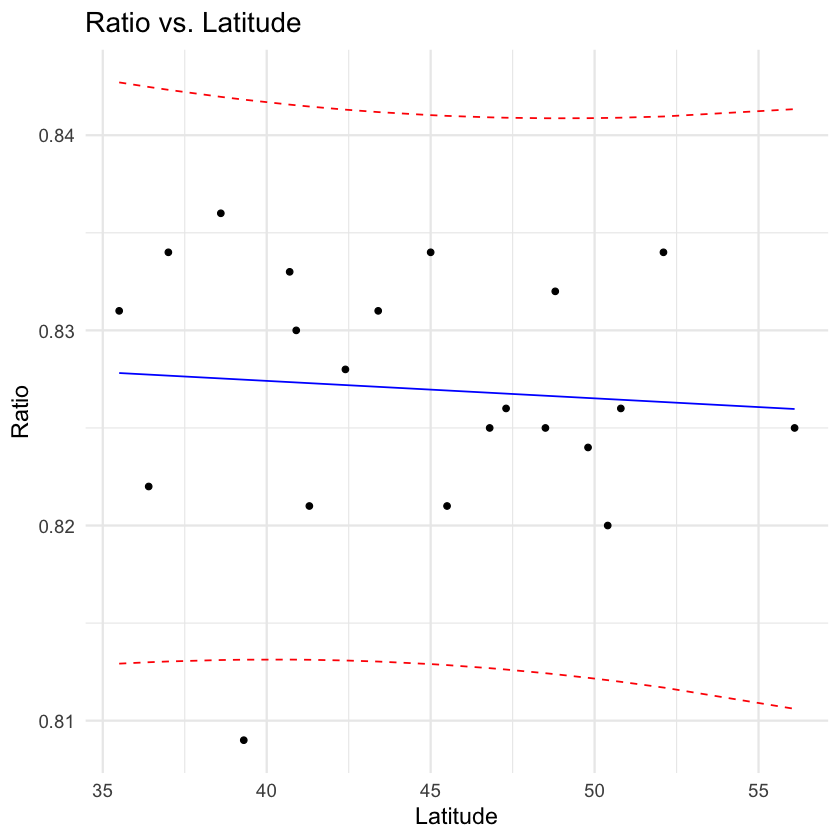

In [11]:
pred <- predict(model_latitude, interval = "prediction", newdata = df)

df_pred <- cbind(Latitude = df$Latitude, as.data.frame(pred))

# Plot
library(ggplot2)
ggplot() +
  geom_point(data = df, aes(x = Latitude, y = Ratio)) +
  geom_line(data = df_pred, aes(x = Latitude, y = fit), color = "blue") +
  geom_line(data = df_pred, aes(x = Latitude, y = lwr), color = "red", linetype = "dashed") +
  geom_line(data = df_pred, aes(x = Latitude, y = upr), color = "red", linetype = "dashed") +
  labs(
    title = "Ratio vs. Latitude",
    x = "Latitude",
    y = "Ratio"
  ) +
  theme_minimal(base_size = 14)

#### Interpretace:

- **Koeficient Latitude**: -0.000089 → velmi malý a záporný vliv.
- **P-hodnota**: 0.732 → není statisticky významné, žádný prokazatelný vliv.
- **R²**: 0.006 → Latitude vysvětluje pouze 0,6 % variability v Ratio.

Celkový model: **Není statisticky významný** (p = 0.7317). Latitude nemá žádný prokazatelný vliv na Ratio. Model jako celek není statisticky významný, a vysvětluje pouze zanedbatelné množství variability v datech.

## Úloha 3 (5b): Vyberte si jednu kategoriální proměnnou jako regresor.

- Pomocí modelu analýzy rozptylu zkoumejte závislost vysvětlované proměnné na tomto regresoru.
- Prakticky interpretujte hodnotu regresních koeficientů.
- Zhodnoťte kvalitu modelu.

Jako kategorialni regresor zvolime promennou Continent

In [12]:
anova_continent <- aov(Ratio ~ Continent, data = df)
summary(anova_continent)

            Df    Sum Sq   Mean Sq F value  Pr(>F)   
Continent    1 0.0003111 3.111e-04   11.53 0.00304 **
Residuals   19 0.0005129 2.699e-05                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [13]:
model_continent <- lm(Ratio ~ Continent, data = df)
summary(model_continent)


Call:
lm(formula = Ratio ~ Continent, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0146667 -0.0026667  0.0005556  0.0023333  0.0103333 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.831444   0.001732 480.087  < 2e-16 ***
ContinentEU -0.007778   0.002291  -3.395  0.00304 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005196 on 19 degrees of freedom
Multiple R-squared:  0.3776,	Adjusted R-squared:  0.3448 
F-statistic: 11.53 on 1 and 19 DF,  p-value: 0.00304


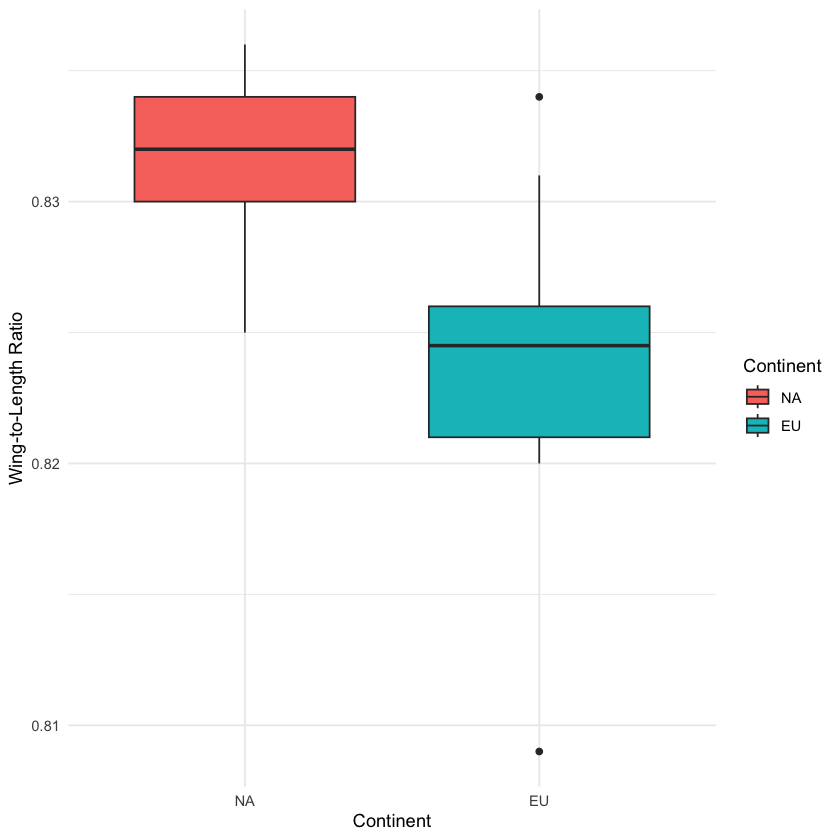

In [14]:
ggplot(df, aes(x = Continent, y = Ratio, fill = Continent)) +
  geom_boxplot() +
  labs(x = "Continent", y = "Wing-to-Length Ratio") +
  theme_minimal()

#### Interpretace

- **Koeficient ContinentEU**: -0.007778 → Evropský kontinent má o 0.0078 nižší hodnoty Ratio než referenční kategorie.
- **P-hodnota**: 0.00304 → Statisticky významné, tedy existuje prokazatelný vliv kontinentality na Ratio.
- **R²**: 0.3776 → Model vysvětluje 37.8 % variability v Ratio.
- **Intercept**: 0.831444 reprezentuje průměrnou hodnotu Ratio pro výchozí kontinent, pokud Continent = "reference".

Celkový model: **Statisticky významný** (p = 0.00304).

## Úloha 4 (5b): Uvažujte regresní model, obsahující oba regresory z předchozích bodů včetně jejich interakce.

- Odhadněte jeho parametry a interpretujte je.
- Prozkoumejte významnost jednotlivých komponent.
- Regresní závislost vhodně graficky zobrazte.

In [15]:
model_interaction <- lm(Ratio ~ Latitude * Continent, data = df)
summary(model_interaction)
anova(model_interaction)


Call:
lm(formula = Ratio ~ Latitude * Continent, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0108129 -0.0022712  0.0002317  0.0026196  0.0090638 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.8436562  0.0161465  52.250   <2e-16 ***
Latitude             -0.0002925  0.0003848  -0.760   0.4576    
ContinentEU          -0.0441951  0.0201171  -2.197   0.0422 *  
Latitude:ContinentEU  0.0008104  0.0004616   1.755   0.0972 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004861 on 17 degrees of freedom
Multiple R-squared:  0.5125,	Adjusted R-squared:  0.4264 
F-statistic: 5.956 on 3 and 17 DF,  p-value: 0.005741


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Latitude,1,5.216702e-06,5.216702e-06,0.2207503,0.644439370
Continent,1,3.442178e-04,3.442178e-04,14.5659456,0.001380393
Latitude:Continent,1,7.282685e-05,7.282685e-05,3.0817461,0.097176689
Residuals,17,4.017386e-04,2.363168e-05,NA,NA


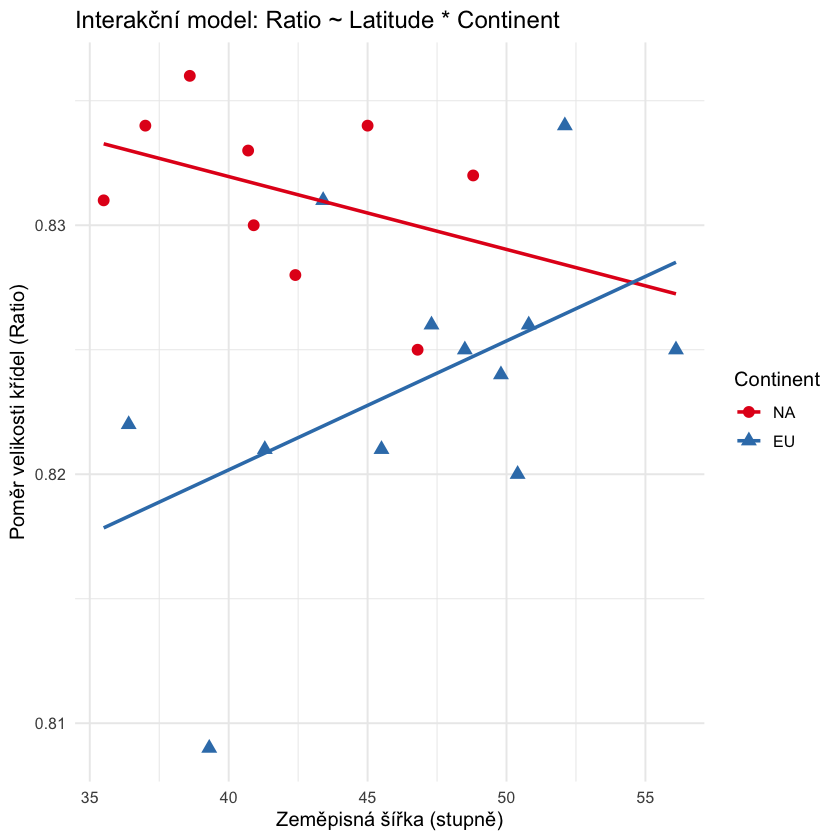

In [16]:
interact_grid <- expand.grid(
  Latitude = seq(min(df$Latitude), max(df$Latitude), length.out = 100),
  Continent = levels(df$Continent)
)
interact_grid$Predicted <- predict(model_interaction, newdata = interact_grid)

ggplot(df, aes(x = Latitude, y = Ratio, color = Continent, shape = Continent)) +
  geom_point(size = 3) +
  geom_line(data = interact_grid, aes(x = Latitude, y = Predicted, color = Continent), linewidth = 1) +
  labs(
    title = "Interakční model: Ratio ~ Latitude * Continent",
    x = "Zeměpisná šířka (stupně)",
    y = "Poměr velikosti křídel (Ratio)"
  ) +
  theme_minimal(base_size = 12) +
  scale_color_brewer(palette = "Set1")

#### Interpretace

- **Koeficient Latitude:** -0.0002925 → velmi malý záporný vliv, ale **není statisticky významný** (p = 0.4576), žádný prokazatelný vliv.
- **Koeficient ContinentEU:** -0.0441951 → **statisticky významné** (p = 0.0422), což znamená, že **ContinentEU** má o 0.0442 nižší hodnoty **Ratio** než referenční kategorie.
- **Koeficient Latitude:ContinentEU:** 0.0008104 → interakce mezi **Latitude** a **ContinentEU**, **p = 0.0972** (na hranici významnosti), naznačuje, že vliv Latitude na **Ratio** se liší podle kontinentu, ale není to úplně silný efekt.
- **R²:** 0.5125 → Model vysvětluje **51.25 %** variability v **Ratio**.
- **F-statistic (5.956) p-hodnota (0.005741):** Model je **statisticky významný**.

Celkový model: **Statisticky významný** (p = 0.005741), ale vliv Latitude není silně prokázán.

## Úloha 5 (5b): Uvažujte model s předchozími dvěma regresory a alespoň jedním dalším ze zkoumaného datového souboru.

- Prozkoumejte, které z regresorů jsou pro model významné a které ne.
- Pomocí vhodných nástrojů se pokuste najít vhodný finální model, který chování zkoumané proměnné dobře vysvětluje, ale neobsahuje nevýznamné komponenty.
- Vysvětlete svůj postup a zdůvodněte svojí volbu.
- Výsledný model prakticky interpretujte.

### Zdůvodnění výběru regresorů
Na začátku je třeba vysvětlit výběr prediktorů. Základními prediktory jsou:

- **Latitude**
- **Continent**
- **Females**
- **Males**

Tyto regresory byly vybrány na základě předchozí explorační analýzy dat a především proto, že vysvětlovaná proměnná Ratio má velmi nízkou korelaci s každou jednotlivou proměnnou, jak ukazuje korelační matice v 1. bodě.

Všechny prediktory mají mezi sebou navzájem středně silnou až silnou korelaci (0.66-0.74)
Žádný z prediktorů nemá sám o sobě silnou korelaci s vysvětlovanou proměnnou Ratio (všechny korelace jsou v rozmezí -0.11 až 0.09)

Proto je logické použít všechny dostupné prediktory společně a zkoumat jejich interakce, což může vést k lepší predikční schopnosti modelu, než kdyby byl použit pouze jeden. Vzhledem k nízkým korelacím s vysvětlovanou proměnnou je také vhodné zkoumat nelineární vztahy a interakce mezi prediktory, což může pomoci odhalit komplexnější strukturu v datech.

In [17]:
complex_model <- lm(Ratio ~ Latitude * Continent + Females + Males, data = df)
summary(complex_model)


Call:
lm(formula = Ratio ~ Latitude * Continent + Females + Males, 
    data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0059299 -0.0026879 -0.0001222  0.0019402  0.0080266 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           7.449e-01  8.577e-02   8.684 3.09e-07 ***
Latitude             -7.482e-04  3.584e-04  -2.088  0.05432 .  
ContinentEU          -5.900e-02  1.812e-02  -3.256  0.00531 ** 
Females               2.878e-04  9.535e-05   3.018  0.00865 ** 
Males                -1.768e-04  9.220e-05  -1.918  0.07438 .  
Latitude:ContinentEU  1.135e-03  4.171e-04   2.721  0.01577 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004025 on 15 degrees of freedom
Multiple R-squared:  0.705,	Adjusted R-squared:  0.6067 
F-statistic: 7.171 on 5 and 15 DF,  p-value: 0.001306


#### Prozkoumání významnosti regresorů
- **Latitude** (p = 0.05432): *Na hranici významnosti*. Vliv Latitude na Ratio není dostatečně prokázaný pro 95% hladinu (p > 0.05).
- **ContinentEU** (p = 0.00531): *Statisticky významný* (p < 0.01). Kontinent má silný záporný vliv na Ratio.
- **Females** (p = 0.00865): *Statisticky významný* (p < 0.01). Vyšší počet samic zvyšuje Ratio.
- **Males** (p = 0.07438): *Na hranici významnosti*. Tento vliv není dostatečně silný pro 95% hladinu.
- **Latitude:ContinentEU** (p = 0.01577): *Statisticky významná* (p < 0.05). Interakce mezi Latitude a ContinentEU ovlivňuje Ratio.

In [18]:
all_models <- list()

# Additive models with 2 predictors
all_models[["Add_Lat_Cont"]] <- lm(Ratio ~ Latitude + Continent, data = df)
all_models[["Add_Lat_Fem"]] <- lm(Ratio ~ Latitude + Females, data = df)
all_models[["Add_Lat_Males"]] <- lm(Ratio ~ Latitude + Males, data = df)
all_models[["Add_Cont_Fem"]] <- lm(Ratio ~ Continent + Females, data = df)
all_models[["Add_Cont_Males"]] <- lm(Ratio ~ Continent + Males, data = df)
all_models[["Add_Fem_Males"]] <- lm(Ratio ~ Females + Males, data = df)

# Interaction models with 2 predictors
all_models[["Int_Lat_Cont"]] <- lm(Ratio ~ Latitude * Continent, data = df)
all_models[["Int_Lat_Fem"]] <- lm(Ratio ~ Latitude * Females, data = df)
all_models[["Int_Lat_Males"]] <- lm(Ratio ~ Latitude * Males, data = df)
all_models[["Int_Cont_Fem"]] <- lm(Ratio ~ Continent * Females, data = df)
all_models[["Int_Cont_Males"]] <- lm(Ratio ~ Continent * Males, data = df)
all_models[["Int_Fem_Males"]] <- lm(Ratio ~ Females * Males, data = df)

# Quadratic and interaction combinations with 2 predictors
all_models[["Quad_Lat_Fem"]] <- lm(Ratio ~ I(Latitude^2) + Females, data = df)
all_models[["Quad_Lat_Males"]] <- lm(Ratio ~ I(Latitude^2) + Males, data = df)
all_models[["Lat_Quad_Fem"]] <- lm(Ratio ~ Latitude + I(Females^2), data = df)
all_models[["Lat_Quad_Males"]] <- lm(Ratio ~ Latitude + I(Males^2), data = df)
all_models[["Quad_Fem_Males"]] <- lm(Ratio ~ I(Females^2) + Males, data = df)
all_models[["Fem_Quad_Males"]] <- lm(Ratio ~ Females + I(Males^2), data = df)
all_models[["Quad_Fem_Quad_Males"]] <- lm(Ratio ~ I(Females^2) + I(Males^2), data = df)

# 3-predictor additive models
all_models[["Add_Lat_Cont_Fem"]] <- lm(Ratio ~ Latitude + Continent + Females, data = df)
all_models[["Add_Lat_Cont_Males"]] <- lm(Ratio ~ Latitude + Continent + Males, data = df)
all_models[["Add_Lat_Fem_Males"]] <- lm(Ratio ~ Latitude + Females + Males, data = df)
all_models[["Add_Cont_Fem_Males"]] <- lm(Ratio ~ Continent + Females + Males, data = df)

# 3-predictor interaction models
all_models[["Int_Lat_Cont_Add_Fem"]] <- lm(Ratio ~ Latitude * Continent + Females, data = df)
all_models[["Int_Lat_Cont_Add_Males"]] <- lm(Ratio ~ Latitude * Continent + Males, data = df)
all_models[["Int_Lat_Fem_Add_Cont"]] <- lm(Ratio ~ Latitude * Females + Continent, data = df)
all_models[["Int_Lat_Fem_Add_Males"]] <- lm(Ratio ~ Latitude * Females + Males, data = df)
all_models[["Int_Lat_Males_Add_Cont"]] <- lm(Ratio ~ Latitude * Males + Continent, data = df)
all_models[["Int_Lat_Males_Add_Fem"]] <- lm(Ratio ~ Latitude * Males + Females, data = df)
all_models[["Int_Cont_Fem_Add_Lat"]] <- lm(Ratio ~ Continent * Females + Latitude, data = df)
all_models[["Int_Cont_Fem_Add_Males"]] <- lm(Ratio ~ Continent * Females + Males, data = df)
all_models[["Int_Cont_Males_Add_Lat"]] <- lm(Ratio ~ Continent * Males + Latitude, data = df)
all_models[["Int_Cont_Males_Add_Fem"]] <- lm(Ratio ~ Continent * Males + Females, data = df)
all_models[["Int_Fem_Males_Add_Lat"]] <- lm(Ratio ~ Females * Males + Latitude, data = df)
all_models[["Int_Fem_Males_Add_Cont"]] <- lm(Ratio ~ Females * Males + Continent, data = df)

# 3-predictor 2-way interactions
all_models[["Int_Lat_Cont_Fem"]] <- lm(Ratio ~ Latitude * Continent * Females, data = df)
all_models[["Int_Lat_Cont_Males"]] <- lm(Ratio ~ Latitude * Continent * Males, data = df)
all_models[["Int_Lat_Fem_Males"]] <- lm(Ratio ~ Latitude * Females * Males, data = df)
all_models[["Int_Cont_Fem_Males"]] <- lm(Ratio ~ Continent * Females * Males, data = df)

# Full additive model with all 4 predictors
all_models[["Add_All"]] <- lm(Ratio ~ Latitude + Continent + Females + Males, data = df)

# Full model with selected interactions
all_models[["Int_Lat_Cont_Add_Fem_Males"]] <- lm(Ratio ~ Latitude * Continent + Females + Males, data = df)
all_models[["Int_Lat_Cont_Add_Fem_Int_Males"]] <- lm(Ratio ~ Latitude * Continent + Females * Males, data = df)
all_models[["Int_Lat_Cont_Int_Fem_Males"]] <- lm(Ratio ~ Latitude * Continent * Females + Males, data = df)
all_models[["Int_Lat_Add_Cont_Int_Fem_Males"]] <- lm(Ratio ~ Latitude + Continent + Females * Males, data = df)

# Models with quadratic terms and interactions
all_models[["Int_Lat_Cont_Quad_Fem"]] <- lm(Ratio ~ Latitude * Continent + I(Females^2), data = df)
all_models[["Int_Lat_Cont_Quad_Males"]] <- lm(Ratio ~ Latitude * Continent + I(Males^2), data = df)
all_models[["Int_Lat_Cont_Quad_Fem_Males"]] <- lm(Ratio ~ Latitude * Continent + I(Females^2) + Males, data = df)
all_models[["Int_Lat_Cont_Fem_Quad_Males"]] <- lm(Ratio ~ Latitude * Continent + Females + I(Males^2), data = df)
all_models[["Int_Lat_Cont_Quad_Fem_Quad_Males"]] <- lm(Ratio ~ Latitude * Continent + I(Females^2) + I(Males^2), data = df)
all_models[["Int_Lat_Cont_Int_Quad_Fem_Males"]] <- lm(Ratio ~ Latitude * Continent + I(Females^2) * Males, data = df)
all_models[["Int_Lat_Cont_Int_Fem_Quad_Males"]] <- lm(Ratio ~ Latitude * Continent + Females * I(Males^2), data = df)
all_models[["Int_Lat_Cont_Int_Quad_Fem_Quad_Males"]] <- lm(Ratio ~ Latitude * Continent + I(Females^2) * I(Males^2), data = df)

# Add the most complex models
all_models[["Complex1"]] <- lm(Ratio ~ Latitude * Continent * Females * Males, data = df)
all_models[["Complex2"]] <- lm(Ratio ~ Latitude * Continent * I(Females^2) * I(Males^2), data = df)

# Create function to extract model statistics for comparison
extract_model_stats <- function(model) {
  summary_model <- summary(model)
  return(c(
    R_squared = summary_model$r.squared,
    Adj_R_squared = summary_model$adj.r.squared,
    AIC = AIC(model),
    BIC = BIC(model),
    df = length(coef(model)) - 1,
    Residual_df = summary_model$df[2]
  ))
}

# Apply function to all models
model_comparison <- lapply(all_models, extract_model_stats)
comparison_df <- as.data.frame(do.call(rbind, model_comparison))
comparison_df$Model <- rownames(comparison_df)
comparison_df <- comparison_df[, c("Model", "R_squared", "Adj_R_squared", "AIC", "BIC", "df", "Residual_df")]

# Round numeric columns for better readability
comparison_df[, 2:7] <- round(comparison_df[, 2:7], 4)

# Sort by adjusted R-squared (descending)
comparison_df_sorted <- comparison_df[order(-comparison_df$Adj_R_squared), ]

# Print top models by adjusted R-squared
cat("Top 10 models by adjusted R-squared:\n")
print(head(comparison_df_sorted, 10))

# Sort by AIC (ascending)
comparison_df_aic <- comparison_df[order(comparison_df$AIC), ]
cat("\nTop 10 models by AIC (lowest values):\n")
print(head(comparison_df_aic, 10))

# Function to run ANOVA between a simpler and more complex model
compare_models <- function(simple_model, complex_model, simple_name, complex_name) {
  anova_result <- anova(all_models[[simple_model]], all_models[[complex_model]])
  cat("\nComparing", simple_name, "vs", complex_name, ":\n")
  print(anova_result)
  return(anova_result)
}


Top 10 models by adjusted R-squared:
                                                                    Model
Int_Lat_Cont_Int_Fem_Males                     Int_Lat_Cont_Int_Fem_Males
Complex2                                                         Complex2
Complex1                                                         Complex1
Int_Lat_Cont_Add_Fem_Int_Males             Int_Lat_Cont_Add_Fem_Int_Males
Int_Lat_Cont_Int_Fem_Quad_Males           Int_Lat_Cont_Int_Fem_Quad_Males
Int_Lat_Cont_Int_Quad_Fem_Males           Int_Lat_Cont_Int_Quad_Fem_Males
Int_Lat_Cont_Int_Quad_Fem_Quad_Males Int_Lat_Cont_Int_Quad_Fem_Quad_Males
Int_Lat_Cont_Fem_Quad_Males                   Int_Lat_Cont_Fem_Quad_Males
Int_Lat_Cont_Quad_Fem_Quad_Males         Int_Lat_Cont_Quad_Fem_Quad_Males
Int_Lat_Cont_Add_Fem_Males                     Int_Lat_Cont_Add_Fem_Males
                                     R_squared Adj_R_squared       AIC
Int_Lat_Cont_Int_Fem_Males              0.8086        0.6810 -168.1915
Complex

Na základě porovnání modelů z hlediska AIC, BIC a R² bychom jako finální model zvolili **Int_Lat_Cont_Int_Fem_Males** model.

- **Model** má nejlepší hodnoty AIC (-168.1915) a BIC (-152.5994), což naznačuje, že je nejlepší volbou z hlediska informace a penalizace za složitost modelu.
- **R²** (0.8086) a **Adjusted R²** (0.6810) ukazují, že tento model vysvětluje většinu variability v závislé proměnné (Ratio) a je robustní.
- Ostatní modely mají nižší hodnoty AIC a BIC, což znamená, že nabízejí horší fit a vysvětlení variability v datech.

Finální model tedy bude **Int_Lat_Cont_Int_Fem_Males model**, který zahrnuje všechny relevantní regresory a interakce.

In [19]:
final_model <- lm(Ratio ~ Latitude * Continent * Females + Males, data = df)
summary(final_model)


Call:
lm(formula = Ratio ~ Latitude * Continent * Females + Males, 
    data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.004556 -0.002363  0.000689  0.002429  0.006297 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)  
(Intercept)                  -3.780e-01  1.652e+00  -0.229   0.8229  
Latitude                      2.781e-02  3.705e-02   0.751   0.4674  
ContinentEU                  -4.728e-01  1.814e+00  -0.261   0.7988  
Females                       1.541e-03  1.845e-03   0.836   0.4197  
Males                        -2.061e-04  9.711e-05  -2.123   0.0553 .
Latitude:ContinentEU          6.673e-03  4.069e-02   0.164   0.8724  
Latitude:Females             -3.121e-05  4.088e-05  -0.763   0.4600  
ContinentEU:Females           4.481e-04  2.002e-03   0.224   0.8267  
Latitude:ContinentEU:Females -5.917e-06  4.482e-05  -0.132   0.8972  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard e

**U modelu provedeme test model–podmodel, abychom ověřili, zda jej nelze redukovat na jednodušší model bez interakcí nebo s menším počtem interakcí.**

In [20]:
# Model1: pouze dvoucestné interakce
model1 <- lm(Ratio ~ Latitude + Continent + Females + Males + 
             Latitude:Continent + Latitude:Females + Continent:Females, 
             data = df)

# Model2: pouze hlavní efekty
model2 <- lm(Ratio ~ Latitude + Continent + Females + Males, data = df)

# Test model-podmodel pomocí ANOVA
anova_test1 <- anova(model1, final_model)
anova_test2 <- anova(model2, final_model)
anova_test3 <- anova(model2, model1)

# Výsledky testů
cat("Test model1 (dvoucestné interakce) vs. final_model (třícestné interakce):\n")
print(anova_test1)
cat("\n")
cat("Test model2 (pouze hlavní efekty) vs. final_model (třícestné interakce):\n")
print(anova_test2)
cat("\n")
cat("Test model2 (pouze hlavní efekty) vs. model1 (dvoucestné interakce):\n")
print(anova_test3)
cat("\n")

models_compare <- data.frame(
  Model = c("Final model (třícestné interakce)", 
            "Model1 (dvoucestné interakce)", 
            "Model2 (pouze hlavní efekty)"),
  AIC = c(AIC(final_model), AIC(model1), AIC(model2)),
  BIC = c(BIC(final_model), BIC(model1), BIC(model2)),
  Adj_R_squared = c(summary(final_model)$adj.r.squared, 
                    summary(model1)$adj.r.squared, 
                    summary(model2)$adj.r.squared)
)

print(models_compare)

Test model1 (dvoucestné interakce) vs. final_model (třícestné interakce):
Analysis of Variance Table

Model 1: Ratio ~ Latitude + Continent + Females + Males + Latitude:Continent + 
    Latitude:Females + Continent:Females
Model 2: Ratio ~ Latitude * Continent * Females + Males
  Res.Df        RSS Df  Sum of Sq      F Pr(>F)
1     13 0.00015792                            
2     12 0.00015769  1 2.2904e-07 0.0174 0.8972

Test model2 (pouze hlavní efekty) vs. final_model (třícestné interakce):
Analysis of Variance Table

Model 1: Ratio ~ Latitude + Continent + Females + Males
Model 2: Ratio ~ Latitude * Continent * Females + Males
  Res.Df        RSS Df  Sum of Sq      F  Pr(>F)  
1     16 0.00036303                               
2     12 0.00015769  4 0.00020534 3.9064 0.02952 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Test model2 (pouze hlavní efekty) vs. model1 (dvoucestné interakce):
Analysis of Variance Table

Model 1: Ratio ~ Latitude + Continent + Femal

Na základě poskytnutých informací je **model s dvoucestnými interakcemi (model1) lepší** volbou než původní složitější model s třícestnými interakcemi:
- **Vyšší adjustovaný R²**: Model1 má hodnotu 0.7051, což je lepší než 0.6810 u složitějšího modelu. To znamená, že model1 lépe vysvětluje variabilitu v datech i po penalizaci za počet parametrů.
- **Nižší AIC**: Model1 má AIC = -170.1610, což je nižší než AIC = -168.1915 u složitějšího modelu. Nižší hodnota AIC indikuje lepší rovnováhu mezi přesností a jednoduchostí modelu.
- **Nižší BIC**: Model1 má BIC = -160.7603, což je nižší než BIC = -157.7463 u složitějšího modelu. BIC je obvykle přísnější než AIC ohledně penalizace komplexnosti modelu.

In [21]:
final_model <- model1
summary(final_model)


Call:
lm(formula = Ratio ~ Latitude + Continent + Females + Males + 
    Latitude:Continent + Latitude:Females + Continent:Females, 
    data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0045122 -0.0023645  0.0007796  0.0022746  0.0063163 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -5.780e-01  6.344e-01  -0.911   0.3789  
Latitude              3.234e-02  1.339e-02   2.415   0.0312 *
ContinentEU          -2.347e-01  1.849e-01  -1.269   0.2266  
Females               1.766e-03  6.936e-04   2.546   0.0244 *
Males                -2.099e-04  8.931e-05  -2.350   0.0352 *
Latitude:ContinentEU  1.302e-03  5.270e-04   2.471   0.0281 *
Latitude:Females     -3.621e-05  1.479e-05  -2.449   0.0293 *
ContinentEU:Females   1.854e-04  2.184e-04   0.849   0.4113  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003485 on 13 degrees of freedom
Multiple R-squared:  0.8083

#### Shrnutí modelu
- **R²** = 0.8083, **Adjusted R²** = 0.7051 → Model vysvětluje přes 80 % variability v Ratio, což je výborné. Po penalizaci za počet prediktorů stále 70.5 %, tedy dobrý fit.

- **Celková statistická významnost modelu**: F(7,13) = 7.833, p = 0.000805 → Model jako celek je statisticky významný.

#### Vysvetleni koeficientu
- **Latitude**: 0.03234 (p = 0.0312). Při referenčním kontinentu, a konstantním počtu žen a mužů, se s každým stupněm zeměpisné šířky zvýší Ratio o 0.0323, efekt je statisticky významný.
- **ContinentEU**: -0.2347 (p = 0.2266). Samotný přechod z referenčního kontinentu do Evropy snižuje Ratio o 0.2347, ale tento efekt není statisticky významný.Tento hlavní efekt se kombinuje s interakcí Latitude:ContinentEU, která je významná.
- **Females**: 0.001766 (p = 0.0244). Statisticky významné.
- **Males**: -0.0002099 (p = 0.0352). Statisticky významné.
- **Latitude:ContinentEU**: 0.001302 (p = 0.0281). V Evropě je efekt Latitude o 0.0013 větší než v NA.
- **Latitude:Females**: -0.00003621 (p = 0.0293). Vliv Latitude na Ratio klesá s každou další ženou o 0.0000362.
- **ContinentEU:Females**: 0.0001854 (p = 0.4113). Tato interakce není statisticky významná (p-hodnota > 0.05)


## Úloha 6 (5b):
- U finálního modelu pomocí vhodných testů ověřte předpoklady metod, které jste použili.

In [22]:
X <- model.matrix(final_model)
X <- X[, apply(X, 2, sd) != 0]  # odstraní sloupce se směrodatnou odchylkou 0
cor(X)

,Latitude,ContinentEU,Females,Males,Latitude:ContinentEU,Latitude:Females,ContinentEU:Females
Latitude,1.0000000,0.4439769,0.7376179,0.6619929,0.5692067,0.9966723,0.4561908
ContinentEU,0.4439769,1.0000000,0.4448930,0.3730212,0.9842045,0.4570341,0.9996687
Females,0.7376179,0.4448930,1.0000000,0.6736524,0.5265091,0.7897444,0.4647924
Males,0.6619929,0.3730212,0.6736524,1.0000000,0.4760107,0.6834329,0.3902043
Latitude:ContinentEU,0.5692067,0.9842045,0.5265091,0.4760107,1.0000000,0.5810105,0.9868079
Latitude:Females,0.9966723,0.4570341,0.7897444,0.6834329,0.5810105,1.0000000,0.4705481
ContinentEU:Females,0.4561908,0.9996687,0.4647924,0.3902043,0.9868079,0.4705481,1.0000000


### Test normality

In [23]:
shapiro.test(residuals(final_model))


	Shapiro-Wilk normality test

data:  residuals(final_model)
W = 0.95167, p-value = 0.3662


Test naznačuje, že rezidua jsou normálně rozdělena (p-hodnota je 0.3662).
Celkově **nemůžeme zamítnout nulovou hypotézu o normalitě** rozdělení dat.

### Q-Q plot

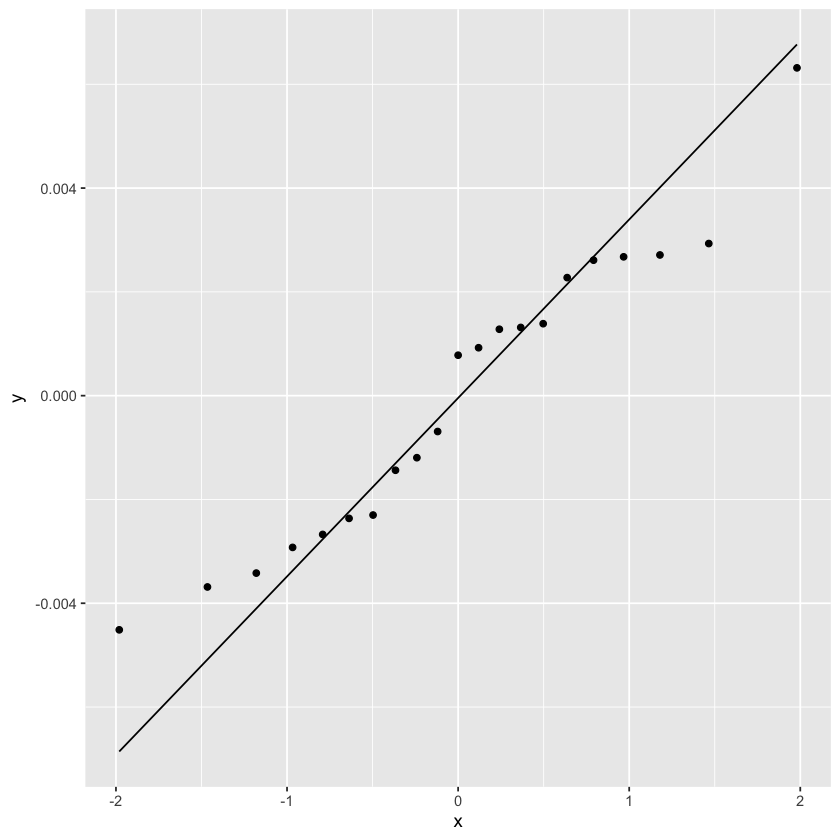

In [24]:
qq_plot <- ggplot(data.frame(Residuals = resid(final_model)), aes(sample = Residuals)) +
    geom_qq() +
    geom_qq_line() 
qq_plot 

### Test shody rozptylů (homoskedasticity)

In [25]:
bptest(final_model)


	studentized Breusch-Pagan test

data:  final_model
BP = 5.7533, df = 7, p-value = 0.5688


### Interpretace:
**H₀ (nulová hypotéza)**: Rozptyl reziduí je konstantní (homoskedasticita).

**H₁ (alternativní hypotéza)**: Rozptyl reziduí není konstantní (heteroskedasticita).

V tomto případě je p-hodnota = 0.5688, což je výrazně vyšší než běžně používaná hladina významnosti. **Nebyla zamítnuta nulová hypotéza**, tedy neexistuje statisticky významná heteroskedasticita. Model **splňuje předpoklad homoskedasticity**.